In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

<center> 

# Hypothesis Testing and p-values

## Amanda R. Kube Jotte
    
<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/DSSI.png" width="800">
    
</center>

## Remember where we left off this morning?

Once we understand our data and have explored it thoroughly, sometimes we want to make stronger claims about the statistics we calculate or compare statistics from different samples.

We do this by testing our **hypotheses** about these statistics in something called a **Hypothesis Test**.

A hypothesis is...

A proposed explanation made on the basis of limited evidence as a starting point for further investigation

Suppose I have a hypothesis about our group:

You are more adept at data science than others at your schools.

I have limited evidence of this, but I can propose this based on the knowledge that you are here!

This is the starting point for further investigation into how good you are at data science compared to others from your school.

What might I need to know to investigate this?

What is my population?

What could I use as a statistic?

## Let's Formalize this

**My Hypothesis:** You are more adept at data science than others at your schools.

**The opposite:** You are NOT more adept at data science than others at your schools. (Not necessarily LESS adept!)

I want to know which is correct.

Statisticians have special words to distinguish the two hypotheses...

## Let's Formalize this

**Alternative Hypothesis (HA or H1):** You are more adept at data science than others at your schools.

**Null Hypothesis (H0):** You are NOT more adept at data science than others at your schools. (Not necessarily LESS adept!)

Null means...

    Invalid, associated with zero

H**0**

If our HA is **invalid**

There is no statistically meaningful relationship!

We frame hypothesis tests around the null hypothesis, assuming there is no meaningful difference until shown otherwise.

## Let's try this on some data

In [2]:
# back to penguins
penguins = pd.read_csv("https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/penguins_size.csv")
penguins.groupby('species').mean(numeric_only = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


I want to investigate whether there is a meaningful difference between flipper lengths for different species of penguin.

Let's focus on *Gentoo* and *Chinstrap* penguins.

What is my null hypothesis?

     H0: Gentoo flipper_length == Chinstrap flipper_length

What is my alternative hypothesis? (3 options...)

     HA: Gentoo flipper_length != Chinstrap flipper_length
     HA: Gentoo flipper_length > Chinstrap flipper_length
     HA: Gentoo flipper_length < Chinstrap flipper_length

Which does the data NOT support?

We call this a two-sided test:
     
     HA: Gentoo flipper_length != Chinstrap flipper_length

We call this a one-sided test:
     
     HA: Gentoo flipper_length > Chinstrap flipper_length

## Testing hypotheses using data

Choosing between two views, called hypotheses, on how data were generated

The test selects the hypothesis that is better supported by the data.

Ingredients:
* A null hypothesis H0
* An alternative hypothesis HA
* A test statistic 
* A decision or a measure of significance 

## Here is a topic, what are the null and alternative hypotheses?

1) According to Glassdoor (the popular salary information website), the mean data scientist salary in the US is 113,000 dollars.

2) Say your friend, Paul, told you that he thinks data scientists earn more than 125,000 dollars per year. You doubt him, so you design a test to see who’s right.

3) Not so long ago, people believed that the world was flat. Several scientists, including Copernicus, set out to study this.

3) Are artists more likely to be left-handed than people found in the general population?

## Back to our penguins

We've got H0 and HA.

Now we need a test statistic...

What would be a useful value to look at to compare these?

In [3]:
flipper_table = penguins.groupby('species').mean(numeric_only = True)[['flipper_length_mm']]
flipper_table

,flipper_length_mm
species,
Adelie,189.953642
Chinstrap,195.823529
Gentoo,217.186992


In [4]:
flipper_table.iloc[2] - flipper_table.iloc[1] 

flipper_length_mm    21.363462
dtype: float64

How do we make a decision on if this difference is meaningful?

## Let's assume the null hypothesis is true...

Then, mixing up the species of the two penguins shouldn't matter... the flipper lengths are not unique to the species

What does the data look like when we do this?

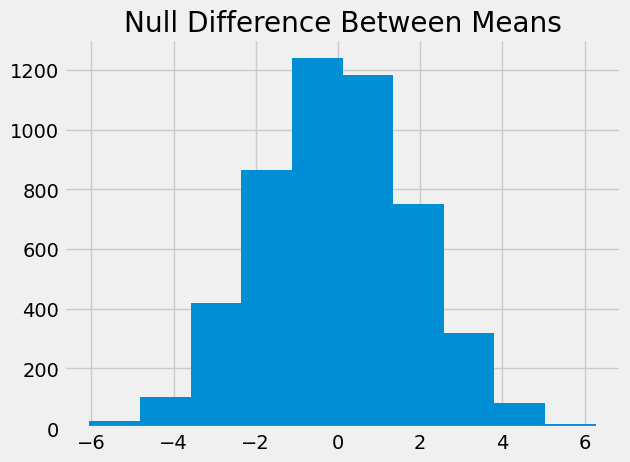

In [5]:
# This is called a permutation test
# You can look more closely at this code on your own, focus on the overall concepts for now
penguins_small = penguins.loc[(penguins.species == 'Chinstrap') | (penguins.species == 'Gentoo')]

flippers = penguins_small[['flipper_length_mm']]
species_labels = penguins_small['species'].values

differences = np.array([])

for i in np.arange(5000):
    shuffled_flippers = flippers.sample(len(flippers),replace = False)['flipper_length_mm'].values
    shuffled_df=pd.DataFrame({"Shuffled Flippers":shuffled_flippers,"Label":species_labels})
    smeans_df=shuffled_df.groupby('Label').mean()
    new_diff=smeans_df.iloc[1]-smeans_df.iloc[0] 
    differences = np.append(differences, new_diff)
    
plt.hist(differences)
plt.title("Null Difference Between Means");

Does our test statistic look like it comes from this distribution of test statistics created assuming the null hypothesis is true?

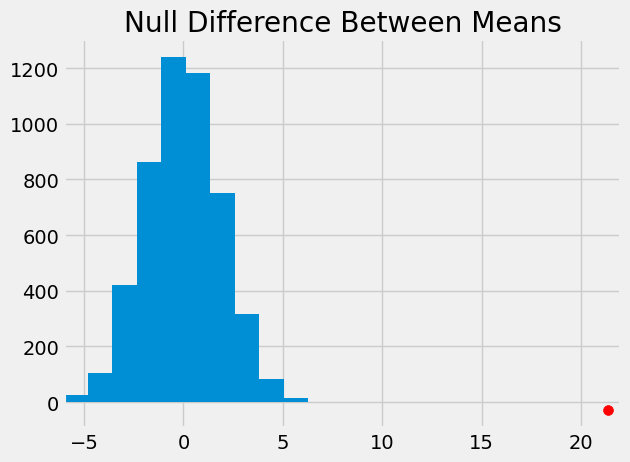

In [6]:
plt.hist(differences)
plt.title("Null Difference Between Means")
plt.xlim([-6, 22])
plt.scatter(flipper_table.iloc[2] - flipper_table.iloc[1] , -30, color='red', s=50);

## Definition of p-value

A p-value captures the consistency of the data (test statistic) with the null hypothesis (distribution of the statistic under the null)

The p-value is the chance:
* under the null hypothesis
* that the test statistic
* is equal to the observed value
* or is further in the direction of the alternative.

It is important to correctly specify the alternative hypothesis

<img src="https://compote.slate.com/images/4bb1d42b-e0d3-4bfa-9b85-103b63977542.jpg?crop=1180%2C842%2Cx0%2Cy0&width=1440" alt="Type1 and Type2 Errors" width="500">

None of our null test statistics were >= our test statistic from the data

So our p-value is 0!

## Interpretation of p-value

P-value is not the probability that H0 is true!
* A small p-value (typically ≤0.05 or 0.01) indicates evidence against the null hypothesis (smaller the p-value, stronger the evidence)
* A large p-value indicates no evidence (or weak evidence) against the null.

## Now, what about something less straightforward?

Compare the body mass of Adelie and Chinstrap penguins.

H0: Adelie body mass == body mass

HA: Adelie body mass <= Chinstrap body mass

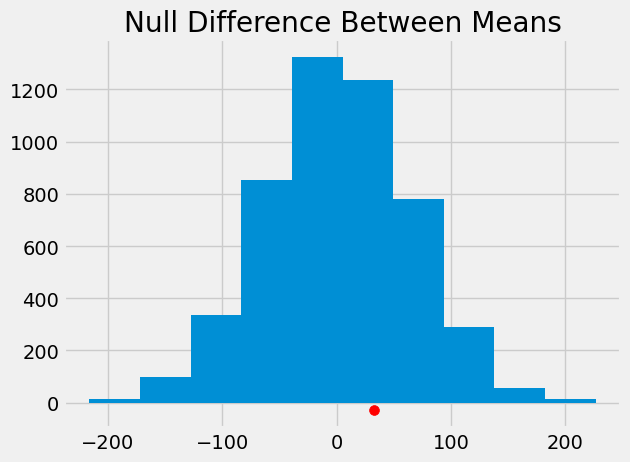

In [7]:
# You can look more closely at this code on your own, focus on the overall concepts for now
penguins_small = penguins.loc[(penguins.species == 'Chinstrap') | (penguins.species == 'Adelie')]
penguinsmass_df = penguins_small.groupby('species').mean(numeric_only = True)[['body_mass_g']]

mass = penguins_small[['body_mass_g']]
species_labels = penguins_small['species'].values

differences = np.array([])

for i in np.arange(5000):
    shuffled_mass = mass.sample(len(mass),replace = False)['body_mass_g'].values
    shuffled_df=pd.DataFrame({"Shuffled Mass":shuffled_mass,"Label":species_labels})
    smeans_df=shuffled_df.groupby('Label').mean()
    new_diff=smeans_df.iloc[1]-smeans_df.iloc[0] 
    differences = np.append(differences, new_diff)
    
plt.hist(differences)
plt.title("Null Difference Between Means");
plt.scatter(penguinsmass_df.iloc[1] - penguinsmass_df.iloc[0] , -30, color='red', s=50);

Now, does our test statistic look like it comes from this distribution of test statistics created assuming the null hypothesis is true?

What is the p-value?

In [8]:
test_stat = float(penguinsmass_df.iloc[1] - penguinsmass_df.iloc[0])
p_value = sum(differences >= test_stat)/5000
p_value

0.31

## Decisions and Statistical Significance

In some studies, a decision needs to be made about which hypothesis to trust:
* Select a cut-off value α, called significance level
  * If P-value ≤α, we reject H0
  * If P-value > α, we do not reject H0

Commonly used significance levels: 0.05 and 0.01
* A test with P-value < 0.05 is called statistically significant
* A test with P-value < 0.01 is called highly significant

## Decisions: Type 1 and Type 2 Errors

In a hypothesis test, we could make a decision about which of H0 or HA might be true, but our decision might be incorrect.

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/Errors.png" alt="Type1 and Type2 Errors" width="500">


* A Type 1 Error is rejecting the H0 when it is true.
* A Type 2 Error is failing to reject the H0 when it is false.

We (almost) never know if H0 or HA is true, but we need to consider all possibilities.

Significance Level = Type 1 Error Rate.

## Consequences of Type 1 and 2 errors

Type 1 and type 2 errors are different sorts of mistakes and have different consequences

Usually H0 is the status quo (generally believed to be true)

Rejecting H0 means something generally accepted is overturned. It might be a scientific breakthrough.

A type 1 error introduces a false conclusion and can lead to a tremendous waste of resources before further research invalidates the original finding

A type 2 error — failing to recognize a scientific breakthrough — represents a missed opportunity

Type 2 errors can be costly as well, but generally go unnoticed

Many scientists believe it is more important to control the Type 1 error rate than the Type 2 error rate.

### True or False
**Q:** If H0 is rejected at 5% level, then we can be certain that H0 is false.

**A: False.** Even if H0 is true, 5% of the time the experiment will give a result with a p-value < 5% so that H0 is rejected.

**Q:** If H0 is rejected at 5% level, there is less than a 5% chance for H0 to be true.

**A: False.** A P-value does not give the chance of H0 being true. In fact, the P-value is computed assuming H0 is true.

*Sir Ronald Fisher* popularized the use of p-values and proposed the level p = 0.05, or a 1 in 20 chance of being exceeded by chance, as a limit for statistical significance (in his 1925 book, Statistical Methods for Research
Workers).

*Albert Einstein:* "No amount of experimentation can ever prove me right; a single experiment can prove me wrong".

   With data, we cannot really prove a hypothesis, but we can disprove it.

   Therefore we never declare the null hypothesis to be true.

Correct statement: "We do not have evidence to reject the null hypothesis".

## How to statisticians do this?

There are pre-built functions that can do hypothesis testing for us.

We can use a **permutation test** when we don't know much about the distribution of our data.

But usually a **Student's t-test** is used to compare the difference in means between two groups.

## Student's t-test

Assumes:
- independent and continuous data
- normally distributed
- randomly sampled
- samples have almost equal standard deviation

## Recall the Central Limit Theorem

Approximately normal distribution for large enough data

Hence we can use this test for things like mean and proportion as test statistics!

## Does our data fit the assumptions?

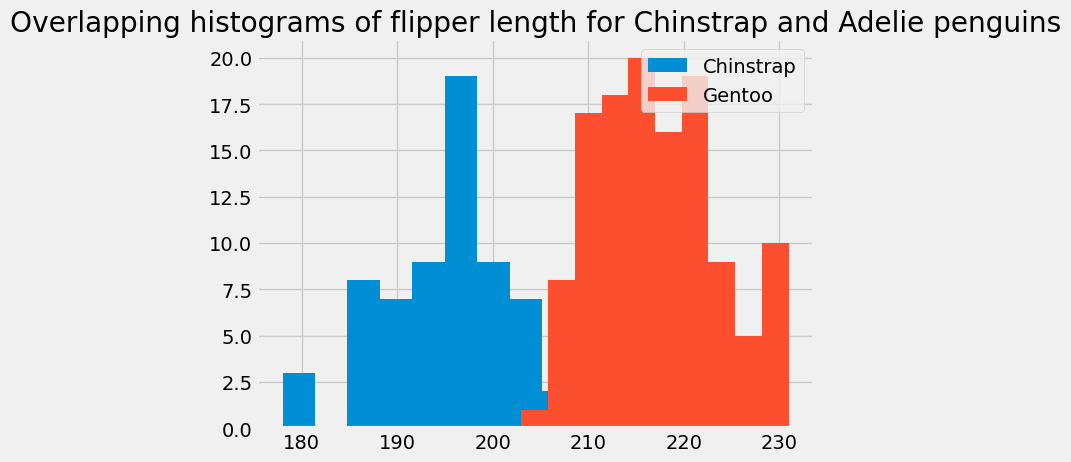

In [9]:
plt.hist(penguins[penguins["species"] == "Chinstrap"]["flipper_length_mm"], 
         label='Chinstrap')
plt.hist(penguins[penguins["species"] == "Gentoo"]["flipper_length_mm"], 
         label='Gentoo')
  
plt.legend(loc='upper right')
plt.title("Overlapping histograms of flipper length for Chinstrap and Adelie penguins")
plt.show()

## Let's run a t-test

In [10]:
from scipy import stats

sample1 = penguins[penguins["species"] == "Chinstrap"]["flipper_length_mm"]
sample2 = penguins[penguins["species"] == "Gentoo"]["flipper_length_mm"]

stats.ttest_ind(sample1, sample2, nan_policy='omit')

Ttest_indResult(statistic=-21.032941180531715, pvalue=2.1740700400090866e-51)

In [11]:
t_stat, p_value = stats.ttest_ind(sample1, sample2, nan_policy='omit')
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -21.032941180531715
P-Value:  2.1740700400090866e-51


Do we come to the same conclusion?

## 3 Types of t-tests

One-sample
- compare mean of sample against a value
- ex. Hypothesis: Gentoo flipper_length is 210mm on average

Two-sample
- What we just did above
- compare means of two independent samples

Paired
- compare means of two related samples
- ie two groups at different points in time
- ex. Is your average knowledge about data science different now than it was 3 days ago?

## Options and Arguments

**One Sided Test**
- Alternative hypothesis is directional

**Two Sided Test**
- Alternative hypothesis is not directional

alternative{‘two-sided’, ‘less’, ‘greater’} (default is two-sided)

**Welch's Test**
- A different version for when standard deviation is not equal

equal_var bool, optional (default is True)

**Permutation Test**
- Does not assume data is normally distributed

permutations non-negative int, np.inf, or None (default), optional
If 0 or None (default), use the t-distribution to calculate p-values. Otherwise, permutations is the number of random permutations that will be used to estimate p-values using a permutation test.

In [12]:
# A one-sample test
t_stat, p_value = stats.ttest_1samp(sample2, 210, nan_policy='omit')
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  12.291116872799643
P-Value:  4.3522920576376815e-23


In [13]:
# A paired test
monday = [1,2,3,2,3,2,1,1]
thursday = [3,3,5,2,4,2,3,2]

t_stat, p_value = stats.ttest_rel(monday, thursday)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -3.8129334558134556
P-Value:  0.00660265592724442


## This is a lot of information...

Takeaways:
- Know what a null hypothesis is and how to write null and alternative hypotheses.
- Know what a p-value is and how to interpret it.
- Know what a t-test is and when to use each type.

## Annotated code for permutation test

In [ ]:
# Select only penguins who are Chinstrap or Adelie and save that subset to a new dataframe named penguins_small

penguins_small = penguins.loc[(penguins.species == 'Chinstrap') | (penguins.species == 'Adelie')]


# Group this new smaller dataset by species and summarize the data by taking the average of the numeric columns.
# We are interested in body mass specifically so let's grab that column and 
# save the resulting dataframe (now with species as an index as penguinsmass_df)

penguinsmass_df = penguins_small.groupby('species').mean(numeric_only = True)[['body_mass_g']]


# Back to the penguins_small dataframe, select the mass column and save it under the name mass
mass = penguins_small[['body_mass_g']]


# Select the species for all penguins and save under the name species_labels 
# (you can also do penguins_small[['species']] like above but I want you to see different ways of doing this)
species_labels = penguins_small['species'].values


# Create an empty array named differences
differences = np.array([])


# Iterate through an array of 5000 values (0 to 4999). This will just execute the following code 500 times
for i in np.arange(5000):
    
    
    # I am sampling mass values here
    # Since I sample as many values are in the mass array, it will essentially shuffle these values
    shuffled_mass = mass.sample(len(mass),replace = False)['body_mass_g'].values
    
    
    # Make a new dataframe with the same species labels in the same order as the original dataframe 
    # but with the shuffled mass values
    shuffled_df=pd.DataFrame({"Shuffled Mass":shuffled_mass,"Label":species_labels})
    
    
    # Group this new dataframe by label and take the mean of the body mass (the only column here)
    smeans_df=shuffled_df.groupby('Label').mean()
    
    
    # Look at the difference between average weights for each group
    new_diff=smeans_df.iloc[1]-smeans_df.iloc[0] 
    
    
    # Append this difference to the end of the differences array
    differences = np.append(differences, new_diff)

# At this point in the code we have an array of 5000 differences between the weights of chinstrap and adelie penguins 
# But these are all after shuffling the weights 

In [ ]:

# Draw a histogram of these differences
plt.hist(differences)
plt.title("Null Difference Between Means");

# Add a dot to the plot that shows our original test statistic ( the true difference between average weights of 
# chinstrap and adelie penguins)
plt.scatter(penguinsmass_df.iloc[1] - penguinsmass_df.iloc[0] , -30, color='red', s=50);